# Data cleaning and EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load file and inspection

In [3]:
dataset = pd.read_csv("loan_data.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

No null values are present

Lets check for data integrity and coherence

In [4]:
dataset["person_age"] = dataset["person_age"].astype("Int64")

Other than the age, everything seems to be according to its type

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  Int64  
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

Now lets check for outliers and errors in coherence

In [6]:
summary = dataset.describe()
print(summary)

       person_age  person_income  person_emp_exp     loan_amnt  loan_int_rate  \
count     45000.0   4.500000e+04    45000.000000  45000.000000   45000.000000   
mean    27.764178   8.031905e+04        5.410333   9583.157556      11.006606   
std      6.045108   8.042250e+04        6.063532   6314.886691       2.978808   
min          20.0   8.000000e+03        0.000000    500.000000       5.420000   
25%          24.0   4.720400e+04        1.000000   5000.000000       8.590000   
50%          26.0   6.704800e+04        4.000000   8000.000000      11.010000   
75%          30.0   9.578925e+04        8.000000  12237.250000      12.990000   
max         144.0   7.200766e+06      125.000000  35000.000000      20.000000   

       loan_percent_income  cb_person_cred_hist_length  credit_score  \
count         45000.000000                45000.000000  45000.000000   
mean              0.139725                    5.867489    632.608756   
std               0.087212                    3.879702

Seeing the summary we can see that there are suspicious values in:
- person_age
- person_emp_exp
- loan_percent_income
- cb-person_cred_hist_lenght

So we will make some plots to know whats happening


Text(0.5, 1.0, 'Credit lenght')

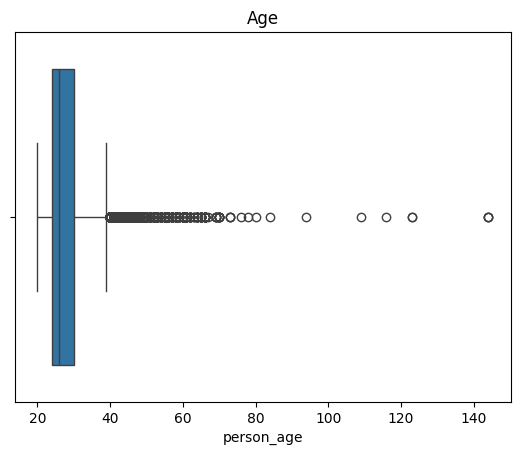

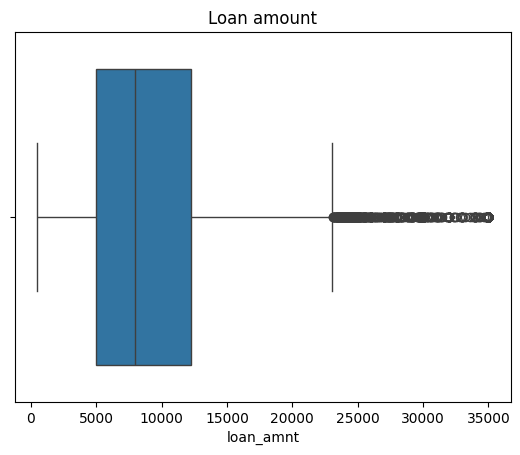

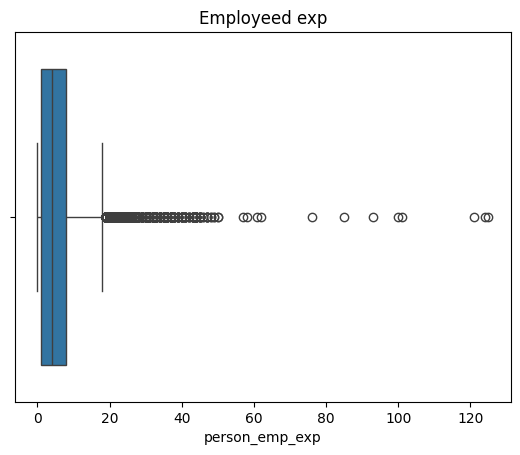

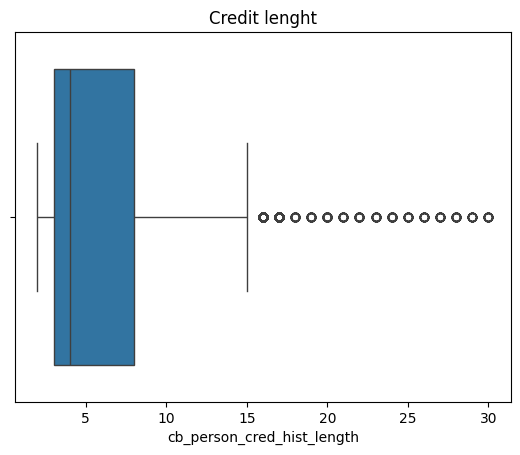

In [7]:
plt.figure()
sns.boxplot(dataset["person_age"],orient="h")
plt.title("Age")
plt.figure()
sns.boxplot(dataset["loan_amnt"],orient="h")
plt.title("Loan amount")
plt.figure()
sns.boxplot(dataset["person_emp_exp"],orient="h")
plt.title("Employeed exp")
plt.figure()
sns.boxplot(dataset["cb_person_cred_hist_length"],orient="h")
plt.title("Credit lenght")

We can clearly see that most of the values are left sided, in fact, the resume showed that up to 75% of the values were in between 20 to 30. It is reasonable to treat most right values as outliers. In order to cut them out of the dataset a treatment by IQR will be done:

In [8]:
treatment = ["person_age","loan_amnt","person_emp_exp","cb_person_cred_hist_length"]
Q1 = dataset[treatment].quantile(0.25)
Q3 = dataset[treatment].quantile(.75)
IQR = Q3 - Q1
low_data = Q1 - 1.5*IQR
high_data = Q3 + 1.5*IQR
out_data_mask = pd.Series(True,index=dataset.index)

for col in treatment:
    out_data_mask &= (dataset[col] >= low_data[col]) & (dataset[col] <= high_data[col])
    filtered = dataset[out_data_mask]

filtered.info()


<class 'pandas.core.frame.DataFrame'>
Index: 40053 entries, 1 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      40053 non-null  Int64  
 1   person_gender                   40053 non-null  object 
 2   person_education                40053 non-null  object 
 3   person_income                   40053 non-null  float64
 4   person_emp_exp                  40053 non-null  int64  
 5   person_home_ownership           40053 non-null  object 
 6   loan_amnt                       40053 non-null  float64
 7   loan_intent                     40053 non-null  object 
 8   loan_int_rate                   40053 non-null  float64
 9   loan_percent_income             40053 non-null  float64
 10  cb_person_cred_hist_length      40053 non-null  float64
 11  credit_score                    40053 non-null  int64  
 12  previous_loan_defaults_on_file  40053

- We lost a liitle more than 10% of the data, which is reasonable for the purposes of the analysis. 
- Now lets check the plots again to make sure everything looks ok.

Text(0.5, 1.0, 'Credit lenght')

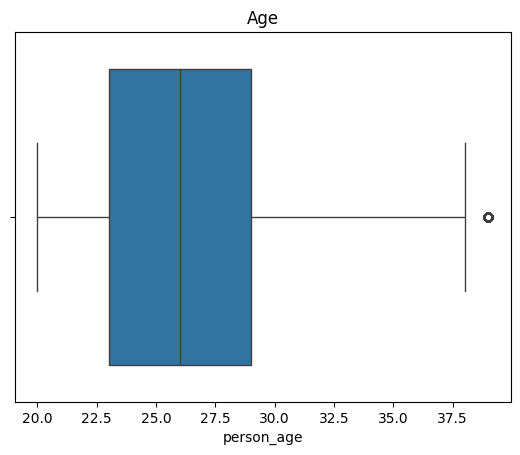

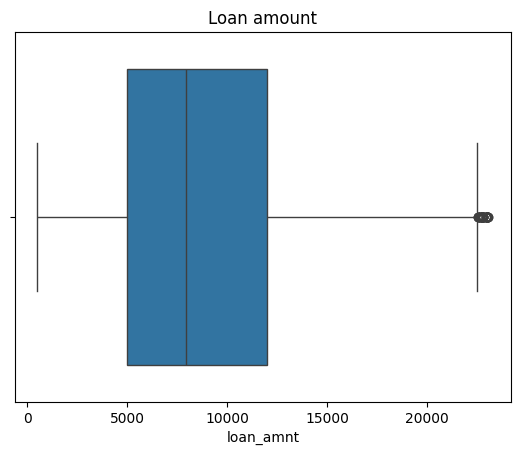

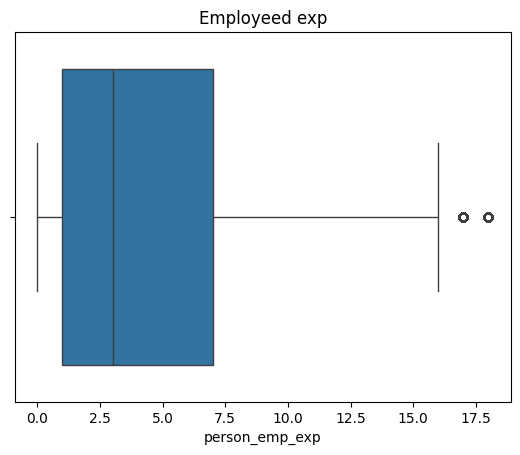

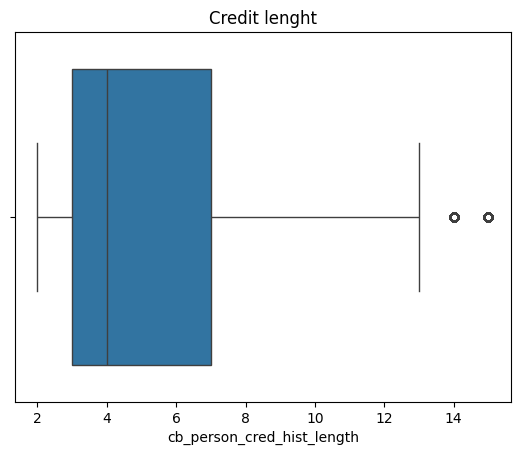

In [9]:
plt.figure()
sns.boxplot(filtered["person_age"],orient="h")
plt.title("Age")
plt.figure()
sns.boxplot(filtered["loan_amnt"],orient="h")
plt.title("Loan amount")
plt.figure()
sns.boxplot(filtered["person_emp_exp"],orient="h")
plt.title("Employeed exp")
plt.figure()
sns.boxplot(filtered["cb_person_cred_hist_length"],orient="h")
plt.title("Credit lenght")

- Now the extreme values on the left are quite close to the edges and reducing outliers greatly

# Bivariate analysis
Now that it seems ok lets do bivariate analysis with numerical variables:


- Since loan_status is the outcome variable what we care of lets make it a percentage of approval to be a able to correlate it with the other numerical values

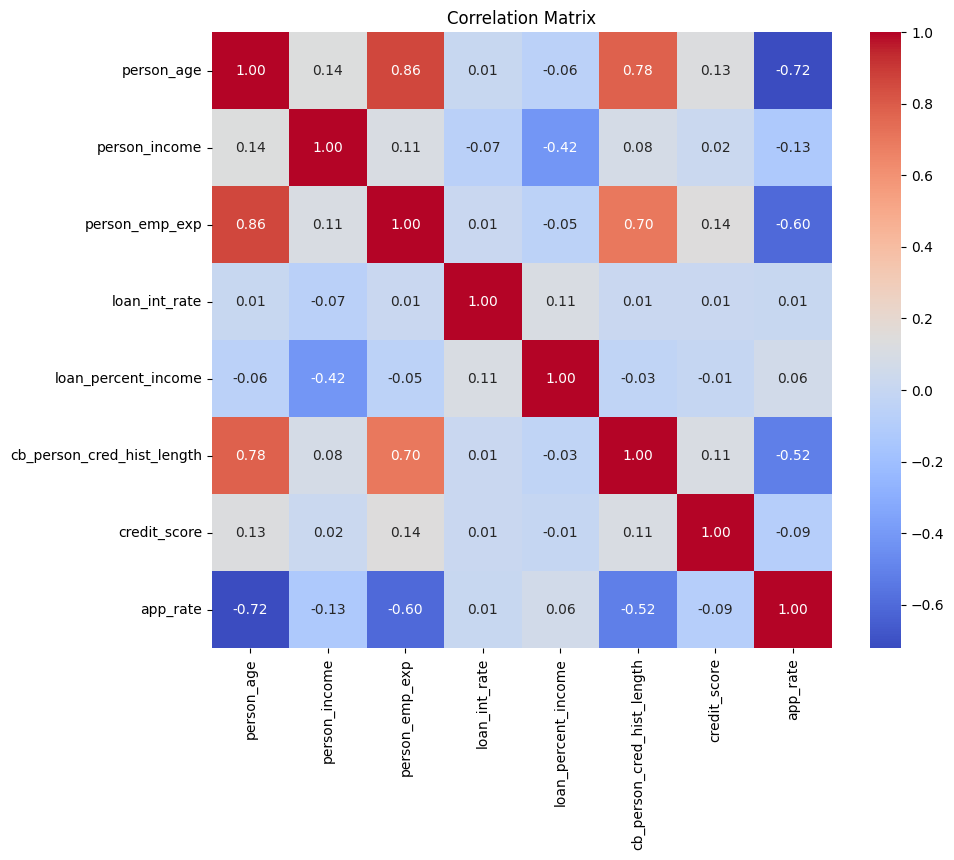

In [10]:
#Numerical values to analyze

numerical_cols = ['person_age', 'person_income', 'person_emp_exp','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score']

#Group by something and calculate average of loan status

app_rate_by_age = filtered.groupby("person_age")["loan_status"].mean().reset_index(name = "app_rate")

added_rate = filtered.merge(app_rate_by_age,on="person_age",how="left")

#Spearman correlation was select because we had right skewed data

spearman_correlation = added_rate[numerical_cols + ['app_rate']].corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

- It seems like age, experience and lenght of hist credit are the most correlated with the approval rate, also those 3 are very correlated between them.
- On the other hand the credit score and person income are not as correlated, and wont be useful when making a prediction model.

### Graphic information about the strongly correlated variables

##### Age analysis against count of applications and percentage of approval

C:\Users\abner\AppData\Local\Temp\ipykernel_26780\3135367148.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Loan Status")


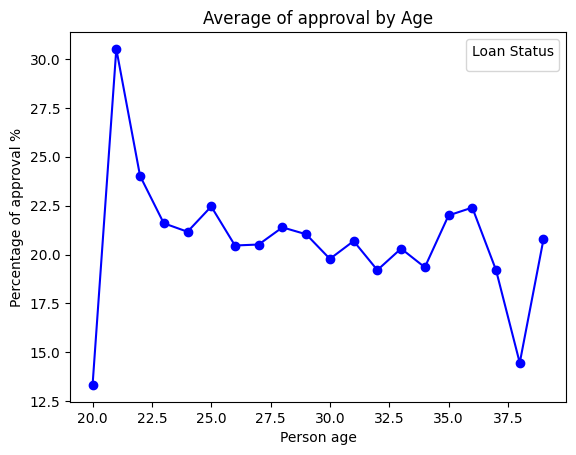

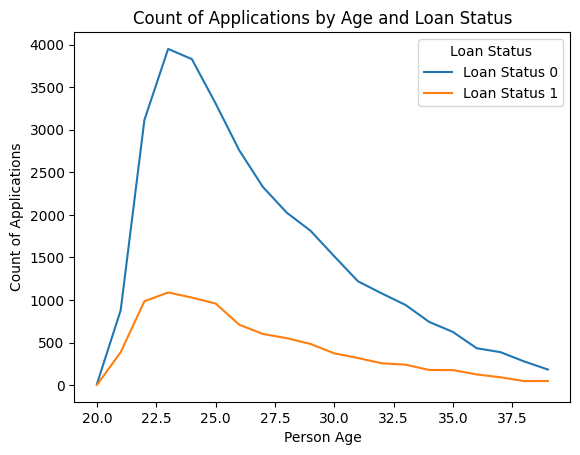

In [11]:
#Being the loan status the variable that we want to monitor
#Lets filter the data and analyze by rejected or approved

average_stat_by_age = filtered.groupby("person_age")["loan_status"].mean().reset_index()
plt.figure()
plt.plot(average_stat_by_age["person_age"],average_stat_by_age["loan_status"]*100,color="blue",marker='o')

#Labels for approval percentage

plt.xlabel("Person age")
plt.ylabel("Percentage of approval %")
plt.title("Average of approval by Age")
plt.legend(title="Loan Status")

#Lets make another plot for the count of applications by age and grouped by status

count_app_by_age_status = filtered.groupby(["person_age", "loan_status"]).size().reset_index(name="count")

# Plot each loan status as a separate line
plt.figure()
for status, group in count_app_by_age_status.groupby("loan_status"):
    plt.plot(group["person_age"], group["count"], label=f"Loan Status {status}")

# Labels for count of apps
plt.xlabel("Person Age")
plt.ylabel("Count of Applications")
plt.title("Count of Applications by Age and Loan Status")
plt.legend(title="Loan Status")



### Insights

- Age is a significant factor for the approval, as it can bee seen, number of applications and approval decreases with age
- Ages around 20 years have a peak in approval and applications, this may indicate a potential target group of the bank since the younger ages represent a significant part of all applications


##### Credit hist length


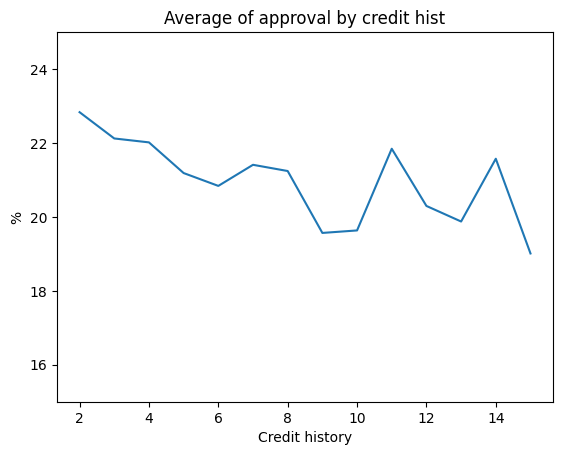

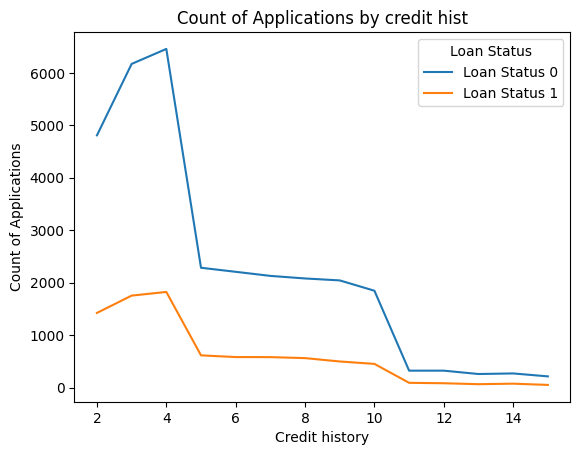

In [12]:
# Lets plot credit hist lenght

#First lets see credit hist against percentage of approval

hist_average = added_rate.groupby("cb_person_cred_hist_length")["loan_status"].mean().reset_index()

plt.figure()
plt.plot(hist_average["cb_person_cred_hist_length"], hist_average["loan_status"]*100)

plt.ylim((15,25))
plt.xlabel("Credit history")
plt.ylabel("%")
plt.title("Average of approval by credit hist")


#Lets plot count of applications with credit hist grouped by loan status

hist_lenght = added_rate.groupby(["cb_person_cred_hist_length","loan_status"]).size().reset_index(name = "count")

plt.figure()
for status, group in hist_lenght.groupby("loan_status"):
    plt.plot(group["cb_person_cred_hist_length"], group["count"], label=f"Loan Status {status}")

plt.xlabel("Credit history")
plt.ylabel("Count of Applications")
plt.title("Count of Applications by credit hist")
plt.legend(title="Loan Status")



##### Insights

- We can see most applications were in the range o 2-5 years of cred history and also had the max percentage of approval
- Although is strongly correlated, there is a really slow but marked downwards trend 
- This could reinforce the idea of a target audience of the bank for the appliance of loans

### Employement experience

Text(0.5, 1.0, 'Count of Applications by credit hist')

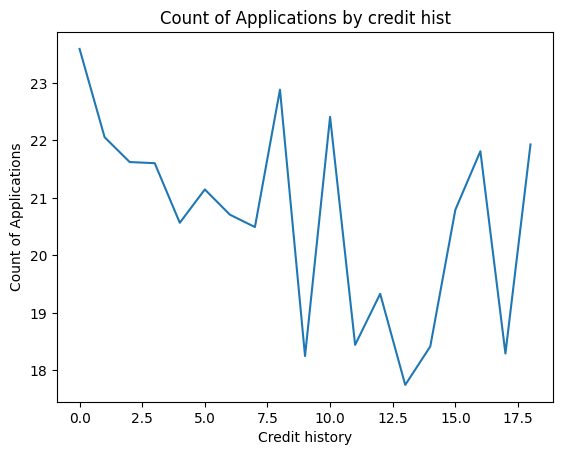

In [14]:
# Lets plot the average of approval and exp

plt.figure()
exp_app = added_rate.groupby("person_emp_exp")["loan_status"].mean().reset_index()
plt.plot(exp_app["person_emp_exp"],exp_app["loan_status"]*100)

plt.xlabel("Credit history")
plt.ylabel("Count of Applications")
plt.title("Count of Applications by credit hist")